# Neural Networks for Data Science Applications
## Final Homework: Putting everything together

**Name**: *Michele Meo*

**Matricola**: *1599032*

Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

**Overview**: The homework is composed of four parts: (i) select a dataset; (ii) implement a custom component (ONLY if you did not submit the first homework); (iii) implement a neural network and train it on the dataset; (iv) perform a post-training operation on the method (interpretation / robustness / fairness).

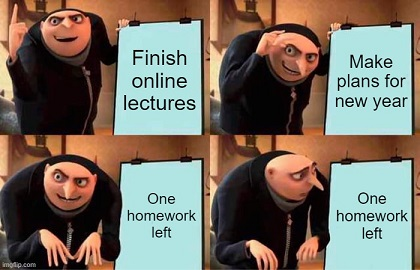

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Important - before starting**: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*.

### Warm-up: Selecting a dataset

During the course, we were able to see only a small selection of datasets. For this homework, you are free to select any dataset that you believe interesting (images, audios, texts)... The task can be either classification or a more complex task (e.g., segmentation, sequence prediction, ...). *For tasks beyond classification, check carefully that the final exercise is viable before starting your implementation.*

A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

You are not bound to these; any open repository is okay. As a rule of thumb, the choice of dataset will not influence the mark, so you can select a complexity that you believe adequate to your skills.

**DESCRIPTION OF THE CODE**: *Provide a small description of the dataset here (e.g., source, task, bibliographic reference if necessary...).*

The data I have chosen is a dataset present in the TensorFlow Datasets catalog (https://www.tensorflow.org/datasets/catalog/colorectal_histology) and it contains a 5000 crops collection obtained from images of colorectal tissues affected by cancer. The dataset is characterized by 8 possible tissue types that are listed below with their respective labels:

* 0: tumor
* 1: stroma
* 2: mucosa
* 3: lympho
* 4: empty
* 5: debris
* 6: complex
* 7: adipose

just to have a first look at the data I show 3 examples respectively of tumor, stroma and adipose cases with the next two cells. As one can see from the TensorFlow Dataset catalog, the dataset is perfectly balanced with 625 examples for each class.



In [ ]:
histo = tfds.load('colorectal_histology', as_supervised=True, data_dir='/content/drive/MyDrive/NN')
histo = histo['train']

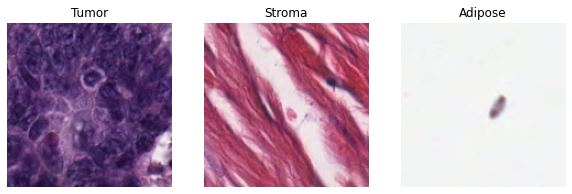

In [ ]:
plt.figure(figsize=(10, 8))
examples = [0, 1, 7]
ex_names = ['Tumor', 'Stroma', 'Adipose']

i = 0
for item in list(histo):
  img = item[0]
  label = item[1]
  if label == examples[i]: 
    plt.subplot(1, 3, i+1)
    plt.title(ex_names[i]) 
    plt.imshow(img)
    plt.axis('off')
    i += 1
  if i == 3: break

Taking inspiration from the fourth lab session (https://colab.research.google.com/drive/19YW9SBe6zGiHAuUeY6ao7v7ydxFtEM45?usp=sharing#scrollTo=oyEsNC8d2Nt3), I implement some image preprocessing to rescale each image in [0, 1] interval and some augmentation procedure to apply on the train split, including the addition of a small random saturation factor that, at training time, seems to increase a bit the model performance.

In [ ]:
def preprocess(image,label):
  image = tf.cast(image,tf.float32) / 255.0
  return image, label

def augment(image,label):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  image = tf.image.random_brightness(image, 0.1)
  image = tf.image.random_saturation(image, 0.95, 1.05)
  return image, label

Now I split the dataset in train, validation and test part and I already split each of them in mini-batches with batch size of 32.

In [ ]:
bs = 32
N = 5000
train_size = int(N*0.8)
val_size = int(N*0.1)
test_size = int(N*0.1)
num_classes = 8
img_shape = (150, 150, 3)

In [ ]:
histo_train = histo.take(train_size).shuffle(1000).batch(bs).map(preprocess).map(augment).prefetch(tf.data.experimental.AUTOTUNE)
histo_val = histo.skip(train_size).take(val_size).batch(bs).map(preprocess).prefetch(tf.data.experimental.AUTOTUNE)
histo_test = histo.skip(train_size + val_size).take(test_size).batch(bs).map(preprocess).prefetch(tf.data.experimental.AUTOTUNE)

### Exercise 1: Implement a custom object (5 points)

**This exercise is required only for students that have not submitted the mid-term homework, or for students who want to raise their mid-term mark (mark <= 3/5). For a mark of 4/5, an additional point can also be recovered during the exam.**

**To recap**: if you submitted the mid-term homework, implement only Exercises 2 and 3, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1, 2, and 3 for a total of *15 points*. 

[Papers With Code](https://paperswithcode.com/methods) is a repository of state-of-the-art tasks and components for deep networks, including:

1. [Optimizers](https://paperswithcode.com/methods/category/optimization)
2. [Residual components](https://paperswithcode.com/methods/category/skip-connection-blocks)
3. [Attention mechanisms](https://paperswithcode.com/methods/category/attention-mechanisms)
4. [Regularizers](https://paperswithcode.com/methods/category/regularization)
5. [Activation functions](https://paperswithcode.com/methods/category/activation-functions)
6. [Normalization blocks](https://paperswithcode.com/methods/category/normalization)
7. [Loss functions](https://paperswithcode.com/methods/category/loss-functions)
8. [Variants of feedforward networks](https://paperswithcode.com/methods/category/feedforward-networks)

Select a component in the categories above **not covered during the course**, and provide a working implementation in **TensorFlow 2.x**. A re-implementation is preferable; if you use an open implementation, state it clearly below. If you re-use parts of an open implementation, also state it clearly below.

**DESCRIPTION OF THE CODE**: *provide a small description of the method you have implemented, with all necessary links. If needed, explain why it is useful for the task you have selected (e.g., if implementing a different loss function).*

In [ ]:
# Insert your custom component here
#class MyCustomDropout(tf.keras.Layer):
  # ...

In [ ]:
# Optionally, briefly show how the component can be used

### Exercise 2: Train on your data (5 points)

This part is straightforward: create a model, according to everything we saw in the course, and train it on the data you have loaded. If you did Exercise 1, **include your custom component here**. Otherwise, you are free to use any components that were not included in the course (layers, losses, metrics, ...), provided you give a brief description below.

**DESCRIPTION OF THE CODE**: *Provide a small description of (i) the model, (ii) the task, (iii) any notable features of your training process.*

In [ ]:
from tensorflow.keras import layers

I have designed a custom model, always taking ispiration from the fourth lab session as a starting point. The main part of the model is the convolutional block, where for each block I mean the application of a convolutional layer, followed by a Batch Normalization layer and a Max Pooling layer if I don't include a stride higher than 1 in the convolutional layer, in order to reduce dimensionality with different tecniques.

In [ ]:
def add_conv_block(x, filters=64, kernel_size=3, stride_step=2, batch_norm=True, maxpool=False):
  # A function to add a block to the model, composed of Conv2D/BatchNormalization/(optional)MaxPool/ReLU.
  # l2 regularization and glorot normal initialization for conv layer, padding is always used
  # for conv layer and maxpool, that is proposed only with a pool size of 2.

  if maxpool == True: stride_step = 1

  x = layers.Conv2D(filters, kernel_size, strides=stride_step, padding='same', 
                    kernel_regularizer=tf.keras.regularizers.l2(1e-3),
                    kernel_initializer=tf.keras.initializers.glorot_normal)(x)

  if maxpool == True: x = layers.MaxPool2D(pool_size=2, padding='same')(x)

  if batch_norm == True: x = layers.BatchNormalization()(x)

  x = layers.ReLU()(x)

  return x

The model is composed by 5 convolutional block, a global average pooling to summarize the output of each activation map obtained at the end of convolutional blocks, a fully-connected layer with 250 units on which Dropout tecnique is applied and a final layer with softmax activation function to get final predictions over classes. I applied Batch Normalization just on convolutional layer and Dropout on dense layer as most common use. After many trials adding or a stride of 2 or a maxpooling layer to the convolutional block as dimensionality reduction option, I found out that the best performance were obtained where I used both methods alternately without increasing a lot the number of filters in convolutional layers as the network depth increase. A summary of the model is shown in the following.

In [ ]:
inp = layers.Input(shape=img_shape)
y = add_conv_block(inp, maxpool=True)
y = add_conv_block(y, filters=128)
y = add_conv_block(y, filters=128, maxpool=True)
y = add_conv_block(y, filters=256)
y = add_conv_block(y, filters=256, maxpool=True)
y = layers.GlobalAveragePooling2D()(y)
y = layers.Dense(250, activation='relu', 
                 kernel_regularizer=tf.keras.regularizers.l2(1e-4))(y)
y = layers.Dropout(0.3)(y)
y = layers.Dense(num_classes, activation='softmax')(y)
model = tf.keras.Model(inp, y)

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 75, 75, 64)        256       
_________________________________________________________________
re_lu_15 (ReLU)              (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 38, 38, 128)       73856     
_________________________________________________________________
batch_normalization_16 (Batc (None, 38, 38, 128)       512 

Since the task is a multiclass classification, I use the sparse categorical Cross-Entropy as loss function and I check the accuracy values on validation data at each epoch to evaluate the training phase along steps: in particular, I use the early-stopping tecnique to avoid overfitting and waste of time, waiting 7 epochs from the best epoch result before restoring the best parameters configuration.

In [ ]:
from tensorflow.keras import losses, optimizers, metrics, callbacks

In [ ]:
model.compile(loss=losses.SparseCategoricalCrossentropy(from_logits=False),
              optimizer=optimizers.Adam(),
              metrics=[metrics.SparseCategoricalAccuracy()])

callbacks = [callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=7, restore_best_weights=True),
             callbacks.TerminateOnNaN()]

In [ ]:
history = model.fit(histo_train, epochs=50, validation_data=histo_val, callbacks=callbacks)

Epoch 1/50
125/125 [==============================] - 12s 83ms/step - loss: 1.4829 - sparse_categorical_accuracy: 0.6612 - val_loss: 6.5507 - val_sparse_categorical_accuracy: 0.1320
Epoch 2/50
125/125 [==============================] - 11s 82ms/step - loss: 1.1764 - sparse_categorical_accuracy: 0.7343 - val_loss: 5.4895 - val_sparse_categorical_accuracy: 0.1320
Epoch 3/50
125/125 [==============================] - 11s 82ms/step - loss: 0.9794 - sparse_categorical_accuracy: 0.7725 - val_loss: 5.6841 - val_sparse_categorical_accuracy: 0.1360
Epoch 4/50
125/125 [==============================] - 11s 84ms/step - loss: 0.8320 - sparse_categorical_accuracy: 0.7987 - val_loss: 2.2683 - val_sparse_categorical_accuracy: 0.4860
Epoch 5/50
125/125 [==============================] - 11s 82ms/step - loss: 0.7624 - sparse_categorical_accuracy: 0.8087 - val_loss: 1.5504 - val_sparse_categorical_accuracy: 0.4580
Epoch 6/50
125/125 [==============================] - 11s 83ms/step - loss: 0.7250 - spars

Now I evaluate the model on test data and I plot the loss function behavior during training.

In [ ]:
model.evaluate(histo_test)

16/16 [==============================] - 4s 30ms/step - loss: 0.6290 - sparse_categorical_accuracy: 0.8240


[0.6289514899253845, 0.8240000009536743]

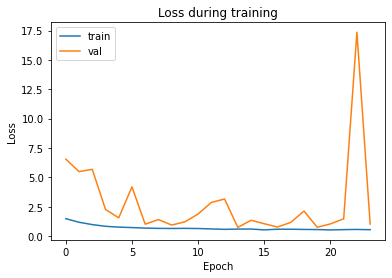

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In order to perform exercise 3 on the best model obtained at any time, I save the model and I show accuracy got on test data for each class with the best model.

In [ ]:
model.save('/content/drive/MyDrive/NN/models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/NN/models/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/NN/models/assets


In [ ]:
# Evaluate predictions on test
predictions = model.predict(histo_test)
predictions = np.argmax(predictions, axis=1)

In [ ]:
# Evaluate accuracy on each class 
target = []
test_data_list = list(histo_test)
for i in range(len(test_data_list)):
  target.extend(test_data_list[i][1])  # create list of all true labels

target = np.array(target)

classes_acc = []
for i in range(num_classes):
  classes_acc.append( np.sum(predictions[target==i] == i)/np.sum(target==i) )  # evaluate accuracy for each class with logical filters/operations

Accuracy related to class "tumor" is: 0.974025974025974


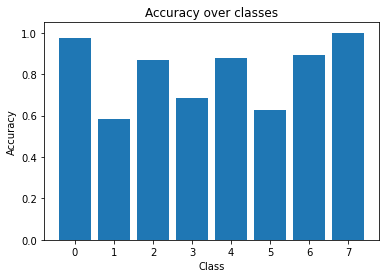

In [ ]:
plt.bar(range(num_classes), classes_acc)
plt.title('Accuracy over classes')
plt.xlabel('Class')
plt.ylabel('Accuracy')

print('Accuracy related to class "tumor" is:', classes_acc[0])

As shown in the bar-plot, accuracy is quite stable on each class a part a lower accuracy for classes 1, 3, 5. However, on the most important class for diagnostic reasons (0 --> "tumor"), the model get an high accuracy.

### Exercise 3 (5 points)

Training a model is only the beginning! Select **one of the three** paths below, and follow the instructions.

1. **Interpreting your model**: interpretability is critical in many applications. Good libraries for obtaining interpetations from your model are [tf-explain](https://github.com/sicara/tf-explain), the original [LIME implementation](https://github.com/marcotcr/lime), and IBM [AIX360 Toolbox](https://github.com/Trusted-AI/AIX360). For this path, select an interpretability method, *read carefully the original paper*, and test it on one of your input examples. You can use one of the basic methods seen in the course, or a more advanced variant (e.g., Gradients*Input, Integrated Gradients, ...).

2. **Attacking your model**: there are a number of libraries for crafting an adversarial attack. Possible alternatives are [CleverHans](https://github.com/tensorflow/cleverhans), [Foolbox](https://github.com/bethgelab/foolbox), or the [Adversarial Robustness Toolbox](https://github.com/Trusted-AI/adversarial-robustness-toolbox). Select one white-box adversarial attack, *read carefully the original paper*, and create an adversarial attack on your network. You can use FGSM as seen in the course, or a more advanced method (e.g., JSMA, ...).

3. **Fairness**: finally, you might want to evaluate whether your model is fair. Good libraries for this are [FAT Forensics](https://fat-forensics.org/) or IBM [AIF360 Toolbox](https://github.com/Trusted-AI/AIF360). For this exercise, select a fairness metric, and evaluate the group fairness on your dataset. Then, apply a post-processing to enforce the fairness, and evaluate the eventual variation in accuracy.

**DESCRIPTION OF THE CODE**: *Provide a description of the method and/or library you have chosen.*

## Interpretability

I decided to do an interpretability study on trained model because I think in medical application it can be the most useful analysis, for example to judge limit cases where there isn't an obvious diagnosis or in general to support professionals. I use **tf-explain** library and I took inspiration for the code part from the following example notebook (https://colab.research.google.com/github/PracticalDL/Practical-Deep-Learning-Book/blob/master/code/chapter-5/3-tf-explain.ipynb#scrollTo=DrELWre7VuaN), just to understand how to start using explainer methods. First of all I install and import modules from tf-explain and I recover the best model and its predictions on test data.

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/NN/models')

In [ ]:
predictions = model.predict(histo_test)
predictions = np.argmax(predictions, axis=1)

target = []
test_data_list = list(histo_test)
for i in range(len(test_data_list)):
  target.extend(test_data_list[i][1])

target = np.array(target)

I implement the **Grad-CAM** method that, given a data example and its predicted class, generates in output a map useful to localize and emphasize the important image regions for the specific prediction. The method creates the map using gradients of target class. In order to show an interest comparison, I decided to apply the method on an image for which the true class "tumor" is well predicted and on an image for which the true class "tumor" is not predicted. Moreover, on the wrong classified image, I show also the difference between applying the Grad-CAM method following gradients of the actual wrong prediction and following gradients of class that would be correct.

Real class is: 0
Predicted class is: 0


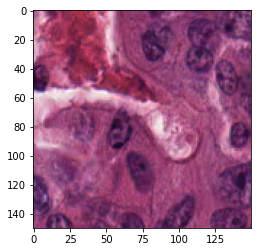

In [ ]:
# Image of tumor class, right prediction (0)
tumor_pred = test_data_list[0][0][1]
plt.imshow(tumor_pred)
print('Real class is:', target[1])
print('Predicted class is:', predictions[1])

Real class is: 0
Predicted class is: 2


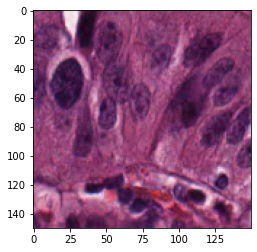

In [ ]:
# Image of tumor class, wrong prediction (2)
for i in range(len(target)):
  if target[i] == 0 and predictions[i] != 0: 
    tumor_error = i  # recover index of first wrong tumor classification
    break

tumor_not_pred = test_data_list[int(tumor_error/bs)][0][tumor_error%bs]  # test_data_list structure: [batch_index][0 for image, 1 for label][image index in the batch]
plt.imshow(tumor_not_pred)
print('Real class is:', target[tumor_error])
print('Predicted class is:', predictions[tumor_error])

In [ ]:
pip install tf_explain

     |████████████████████████████████| 51kB 6.6MB/s 


In [ ]:
import tf_explain
from tf_explain.core import GradCAM, IntegratedGradients
from tf_explain.core.activations import ExtractActivations
tf.config.run_functions_eagerly(True)

In [ ]:
def grad_cam_interpret(model, image, pred):
  # Grad-CAM implementation of trained model for specific image and
  # corresponding prediction (or other allowed class)
  explainer = GradCAM()
  grid = explainer.explain(([image.numpy()], None), model, class_index=pred)  
  plt.imshow(grid)

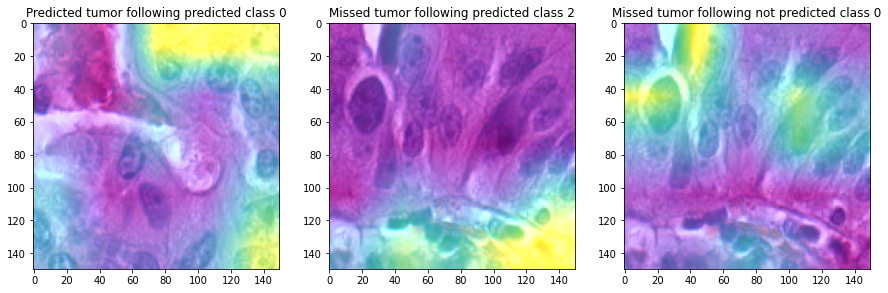

In [ ]:
# I apply the grad_cam function to a well classified image and a wrong classified
# image... on the wrong case I apply also grad_cam using the not predicted right
# class of "tumor", just to interpret differences

plt.figure(figsize=(15, 11))
images = [tumor_pred, tumor_not_pred, tumor_not_pred]
pred = [0, 2, 0]
titles = ['Predicted tumor', 'Missed tumor', 'Missed tumor']
adj = ['predicted', 'predicted', 'not predicted']

for i in range(len(images)):
  plt.subplot(1, 3, i+1)
  grad_cam_interpret(model, images[i], pred[i])
  plt.title(titles[i] + ' following '+ adj[i] + ' class ' + str(pred[i]))

From the second visualized map is evident that in the missed classification case the model doesn't focus on the right region: in fact, it seems that the right strategy to obtain the correct prediction of the "tumor" class is to focus on these dark and round-shaped areas, which (I am surely not an expert in the field... so the next statement is only related to visual intuition on a single case) seem to identify tumor masses.

Just for completeness, I report also results obtained by applying the Grad-CAM method on well classified images related to 3 different tissues classes (mucosa, stroma and adipose).

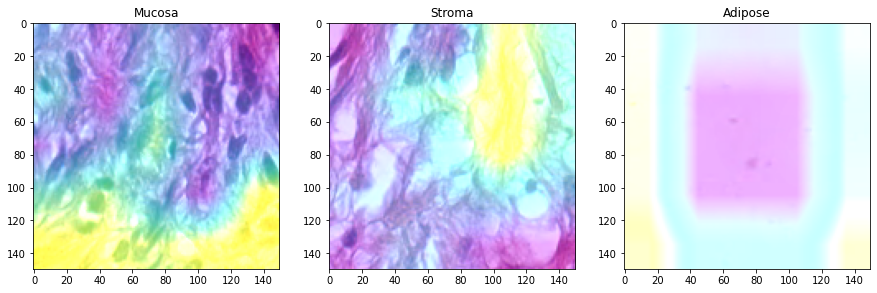

In [ ]:
mucosa_pred = test_data_list[0][0][0] 
stroma_pred = test_data_list[0][0][4] 
adipose_pred = test_data_list[0][0][6] 

plt.figure(figsize=(15, 11))
images = [mucosa_pred, stroma_pred, adipose_pred]
pred = [2, 1, 7]
titles = ['Mucosa', 'Stroma', 'Adipose']

for i in range(len(images)):
  plt.subplot(1, 3, i+1)
  grad_cam_interpret(model, images[i], pred[i])
  plt.title(titles[i])

As second and last interpretability method, I propose to see some **Activations visualization** given the "tumor" image that is correctly classified shown before. Through the use of this method, the activation maps obtained for a specific input image after a specific layer of the model are displayed. In this case, I propose to visualize the activation maps generated by the convolutional layers on which the maxpooling layer is then applied (therefore outputs of first, third and fifth convolutional layer). In this way one can appreciate the increasing number of filters applied, the different features found out and the higher complexity of features going deeper with the model.

In [ ]:
def act_map_interpret(model, image, layer_name):
  # Activations visualization implementation of trained model for a specific image 
  explainer = ExtractActivations()
  image = image.numpy().reshape((1, 150, 150, 3))
  data = ([image], None)
  grid = explainer.explain(data, model, layers_name=layer_name)
  plt.imshow(grid)
  plt.colorbar(shrink=0.3)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3704: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable.debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


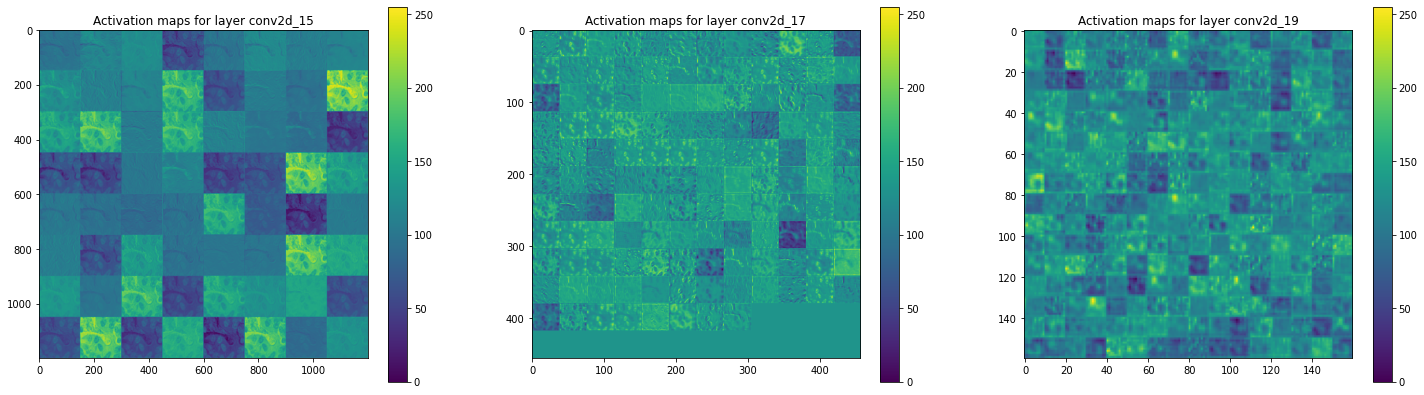

In [ ]:
plt.figure(figsize=(25, 23))
layer_names = ['conv2d_15', 'conv2d_17', 'conv2d_19']

for i in range(len(images)):
  plt.subplot(1, 3, i+1)
  act_map_interpret(model, tumor_pred, layer_names[i])
  plt.title('Activation maps for layer ' + layer_names[i])

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed.
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

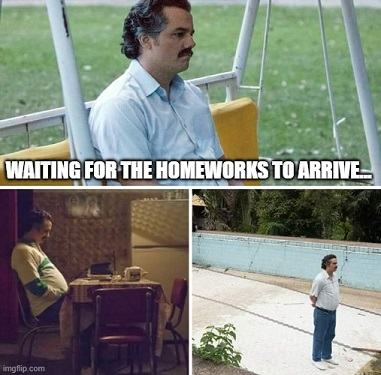